In [32]:
import pandas as pd
import numpy as np
import seaborn as sns                       #visualisation
import matplotlib.pyplot as plt             #visualisation
%matplotlib inline     
sns.set(color_codes=True)

In [33]:
import os
os.chdir("/content/drive/MyDrive/MenonLabs/ytKaggle")
!ls

CA_category_id.json  GBvideos.csv	  MX_category_id.json
CAvideos.csv	     IN_category_id.json  MXvideos.csv
DE_category_id.json  INvideos.csv	  RU_category_id.json
DEvideos.csv	     JP_category_id.json  RUvideos.csv
FR_category_id.json  JPvideos.csv	  US_category_id.json
FRvideos.csv	     KR_category_id.json  USvideos.csv
GB_category_id.json  KRvideos.csv


In [34]:
df = pd.read_csv("INvideos.csv")
df.dtypes
#df.head(10)

video_id                  object
trending_date             object
title                     object
channel_title             object
category_id                int64
publish_time              object
tags                      object
views                      int64
likes                      int64
dislikes                   int64
comment_count              int64
thumbnail_link            object
comments_disabled           bool
ratings_disabled            bool
video_error_or_removed      bool
description               object
dtype: object

In [35]:
df.isnull().sum()
df.fillna("",inplace=True)
df.isnull().sum()

video_id                  0
trending_date             0
title                     0
channel_title             0
category_id               0
publish_time              0
tags                      0
views                     0
likes                     0
dislikes                  0
comment_count             0
thumbnail_link            0
comments_disabled         0
ratings_disabled          0
video_error_or_removed    0
description               0
dtype: int64

In [36]:
df['title_length']  = df['title'].str.len()
df['channel_title_length']  = df['channel_title'].str.len()
df['description_length']  = df['description'].str.len()
#df['tags_count'] = df['tags'].value_counts()
df['tags_count'] = df['tags'].str.split().str.len()

df.head(5)

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,title_length,channel_title_length,description_length,tags_count
0,kzwfHumJyYc,17.14.11,Sharry Mann: Cute Munda ( Song Teaser) | Parmi...,Lokdhun Punjabi,1,2017-11-12T12:20:39.000Z,"sharry mann|""sharry mann new song""|""sharry man...",1096327,33966,798,882,https://i.ytimg.com/vi/kzwfHumJyYc/default.jpg,False,False,False,Presenting Sharry Mann latest Punjabi Song Cu...,81,15,920,45
1,zUZ1z7FwLc8,17.14.11,"पीरियड्स के समय, पेट पर पति करता ऐसा, देखकर दं...",HJ NEWS,25,2017-11-13T05:43:56.000Z,"पीरियड्स के समय|""पेट पर पति करता ऐसा""|""देखकर द...",590101,735,904,0,https://i.ytimg.com/vi/zUZ1z7FwLc8/default.jpg,True,False,False,"पीरियड्स के समय, पेट पर पति करता ऐसा, देखकर दं...",58,7,2232,26
2,10L1hZ9qa58,17.14.11,Stylish Star Allu Arjun @ ChaySam Wedding Rece...,TFPC,24,2017-11-12T15:48:08.000Z,Stylish Star Allu Arjun @ ChaySam Wedding Rece...,473988,2011,243,149,https://i.ytimg.com/vi/10L1hZ9qa58/default.jpg,False,False,False,Watch Stylish Star Allu Arjun @ ChaySam Weddin...,58,4,482,27
3,N1vE8iiEg64,17.14.11,Eruma Saani | Tamil vs English,Eruma Saani,23,2017-11-12T07:08:48.000Z,"Eruma Saani|""Tamil Comedy Videos""|""Films""|""Mov...",1242680,70353,1624,2684,https://i.ytimg.com/vi/N1vE8iiEg64/default.jpg,False,False,False,This video showcases the difference between pe...,30,11,263,24
4,kJzGH0PVQHQ,17.14.11,why Samantha became EMOTIONAL @ Samantha naga ...,Filmylooks,24,2017-11-13T01:14:16.000Z,"Filmylooks|""latest news""|""telugu movies""|""telu...",464015,492,293,66,https://i.ytimg.com/vi/kJzGH0PVQHQ/default.jpg,False,False,False,why Samantha became EMOTIONAL @ Samantha naga ...,88,10,753,30


In [37]:
# print(df['video_id'].value_counts())
# print(df["tags"][:10].str.split().str.len())


In [38]:
df["comments_disabled"]=df["comments_disabled"].replace(to_replace=False, value=-1)
df["comments_disabled"]=df["comments_disabled"].replace(to_replace=True, value=1)
df["ratings_disabled"]=df["ratings_disabled"].replace(to_replace=False, value=-1)
df["ratings_disabled"]=df["ratings_disabled"].replace(to_replace=True, value=1)
df["video_error_or_removed"]=df["video_error_or_removed"].replace(to_replace=False, value=-1)
df["video_error_or_removed"]=df["video_error_or_removed"].replace(to_replace=True, value=1)
df.head(20)

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,title_length,channel_title_length,description_length,tags_count
0,kzwfHumJyYc,17.14.11,Sharry Mann: Cute Munda ( Song Teaser) | Parmi...,Lokdhun Punjabi,1,2017-11-12T12:20:39.000Z,"sharry mann|""sharry mann new song""|""sharry man...",1096327,33966,798,882,https://i.ytimg.com/vi/kzwfHumJyYc/default.jpg,-1.0,-1.0,-1.0,Presenting Sharry Mann latest Punjabi Song Cu...,81,15,920,45
1,zUZ1z7FwLc8,17.14.11,"पीरियड्स के समय, पेट पर पति करता ऐसा, देखकर दं...",HJ NEWS,25,2017-11-13T05:43:56.000Z,"पीरियड्स के समय|""पेट पर पति करता ऐसा""|""देखकर द...",590101,735,904,0,https://i.ytimg.com/vi/zUZ1z7FwLc8/default.jpg,1.0,-1.0,-1.0,"पीरियड्स के समय, पेट पर पति करता ऐसा, देखकर दं...",58,7,2232,26
2,10L1hZ9qa58,17.14.11,Stylish Star Allu Arjun @ ChaySam Wedding Rece...,TFPC,24,2017-11-12T15:48:08.000Z,Stylish Star Allu Arjun @ ChaySam Wedding Rece...,473988,2011,243,149,https://i.ytimg.com/vi/10L1hZ9qa58/default.jpg,-1.0,-1.0,-1.0,Watch Stylish Star Allu Arjun @ ChaySam Weddin...,58,4,482,27
3,N1vE8iiEg64,17.14.11,Eruma Saani | Tamil vs English,Eruma Saani,23,2017-11-12T07:08:48.000Z,"Eruma Saani|""Tamil Comedy Videos""|""Films""|""Mov...",1242680,70353,1624,2684,https://i.ytimg.com/vi/N1vE8iiEg64/default.jpg,-1.0,-1.0,-1.0,This video showcases the difference between pe...,30,11,263,24
4,kJzGH0PVQHQ,17.14.11,why Samantha became EMOTIONAL @ Samantha naga ...,Filmylooks,24,2017-11-13T01:14:16.000Z,"Filmylooks|""latest news""|""telugu movies""|""telu...",464015,492,293,66,https://i.ytimg.com/vi/kJzGH0PVQHQ/default.jpg,-1.0,-1.0,-1.0,why Samantha became EMOTIONAL @ Samantha naga ...,88,10,753,30
5,il_pSa5l98w,17.14.11,"MCA (Middle Class Abbayi) TEASER - Nani,Sai Pa...",Dil Raju,24,2017-11-10T04:29:50.000Z,"Nenu Local|""Nenu Local Telugu Movie""|""Nani""|""S...",6106669,98612,4185,4763,https://i.ytimg.com/vi/il_pSa5l98w/default.jpg,-1.0,-1.0,-1.0,Watch MCA- Middle Class Abbayi First Look Teas...,91,8,449,33
6,7MxiQ4v0EnE,17.14.11,Daang ( Full Video ) | Mankirt Aulakh | Sukh S...,Speed Records,10,2017-11-11T16:41:15.000Z,"punjabi songs|""punjabi bhangra""|""punjabi music...",5718766,127477,7134,8063,https://i.ytimg.com/vi/7MxiQ4v0EnE/default.jpg,-1.0,-1.0,-1.0,Song - Daang\nSinger - Mankirt Aulakh\nFaceboo...,96,13,1411,21
7,c64I9HNpiOY,17.14.11,Padmavati : Ek Dil Ek Jaan Video Song | Deepik...,T-Series,10,2017-11-11T06:14:19.000Z,"Ek Dil Ek Jaan Video Song|""'Ek Dil Ek Jaan'""|""...",10588371,132738,8812,10847,https://i.ytimg.com/vi/c64I9HNpiOY/default.jpg,-1.0,-1.0,-1.0,Presenting the song 'Ek Dil Ek Jaan' from Padm...,96,8,1299,42
8,KObFEYCaRx8,17.14.11,Chiranjeevi in Naga Chaitanya - Samantha Recep...,Top Telugu Media,24,2017-11-13T04:42:26.000Z,Chiranjeevi in Naga Chaitanya - Samantha Recep...,118223,520,53,23,https://i.ytimg.com/vi/KObFEYCaRx8/default.jpg,-1.0,-1.0,-1.0,Chiranjeevi in Naga Chaitanya - Samantha Recep...,97,16,509,39
9,g8QsfJhFpjY,17.14.11,New bike vs Old bike - the reality,Jump Cuts,24,2017-11-12T04:30:01.000Z,"Jump cuts|""Jumpcuts""|""Tamil comedy""|""Tamil Com...",969030,59798,1545,2404,https://i.ytimg.com/vi/g8QsfJhFpjY/default.jpg,-1.0,-1.0,-1.0,Jump Cuts is a Tamil entertaining group by Har...,34,9,477,39


category_id              -0.127600
views                     0.850096
likes                     1.000000
dislikes                  0.494560
comment_count             0.780514
comments_disabled        -0.045624
ratings_disabled         -0.040741
video_error_or_removed    0.028464
title_length             -0.168641
channel_title_length      0.014094
description_length        0.068652
tags_count               -0.014539
Name: likes, dtype: float64


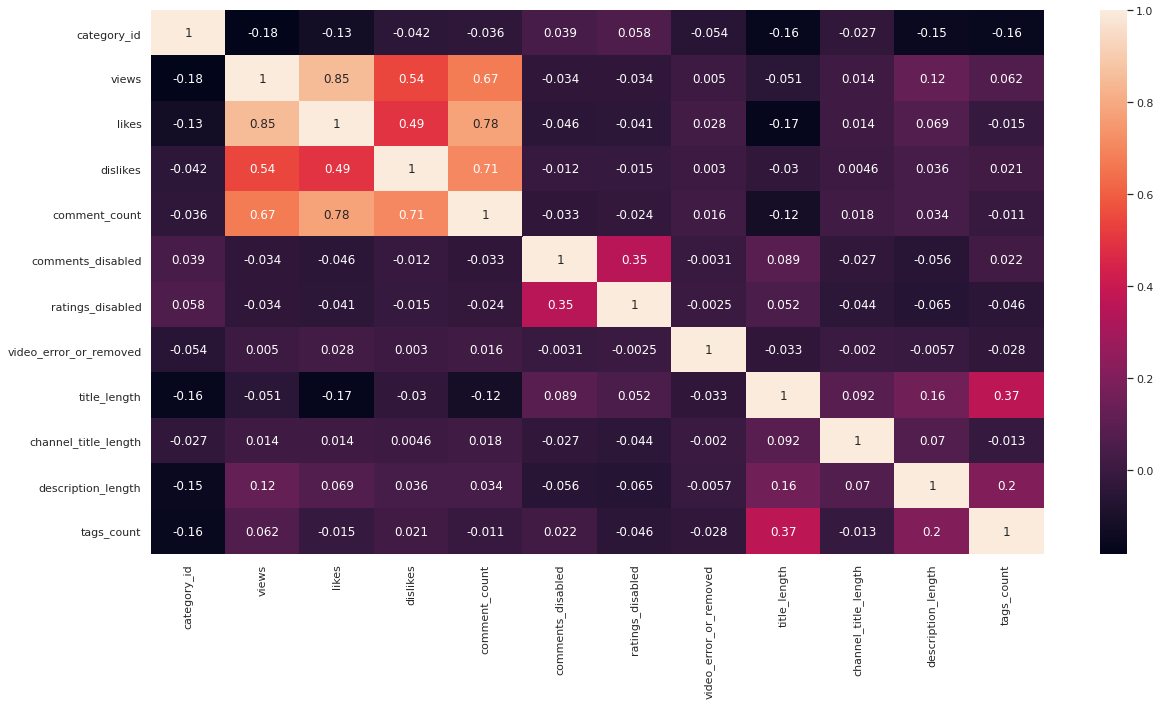

In [39]:
corrData= df.corr().loc["likes", :]
#sns.set(font_scale=1.5)
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(), annot=True)
print(corrData)

In [40]:
df["publish_time"]=pd.to_datetime(df["publish_time"]).dt.tz_localize(None)
#import datetime
#format_str = '%y.%d.%m' # The format
#df["trending_date"]=pd.to_datetime(df["trending_date"],format_str)



tempDate= df["trending_date"].str.split(".", expand= True)

df["yy"]= tempDate[0]

df["mm"]= tempDate[2]
df["dd"]= tempDate[1]
del tempDate
tempDate= df["dd"]+ "/"+df["mm"] + "/" +df["yy"]
#tempDate.head()
df["trending_date"]=pd.to_datetime(tempDate)




In [41]:
df= df.drop(['yy', 'mm', 'dd'], axis = 1)
df["Days_to_trend"]= (df["trending_date"]- df["publish_time"]).dt.days
#df["Days_to_trend"]= df["Days_to_trend"]
df['day_of_week'] = df['publish_time'].dt.day_name()
df.head(10)

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,title_length,channel_title_length,description_length,tags_count,Days_to_trend,day_of_week
0,kzwfHumJyYc,2017-11-14,Sharry Mann: Cute Munda ( Song Teaser) | Parmi...,Lokdhun Punjabi,1,2017-11-12 12:20:39,"sharry mann|""sharry mann new song""|""sharry man...",1096327,33966,798,882,https://i.ytimg.com/vi/kzwfHumJyYc/default.jpg,-1.0,-1.0,-1.0,Presenting Sharry Mann latest Punjabi Song Cu...,81,15,920,45,1,Sunday
1,zUZ1z7FwLc8,2017-11-14,"पीरियड्स के समय, पेट पर पति करता ऐसा, देखकर दं...",HJ NEWS,25,2017-11-13 05:43:56,"पीरियड्स के समय|""पेट पर पति करता ऐसा""|""देखकर द...",590101,735,904,0,https://i.ytimg.com/vi/zUZ1z7FwLc8/default.jpg,1.0,-1.0,-1.0,"पीरियड्स के समय, पेट पर पति करता ऐसा, देखकर दं...",58,7,2232,26,0,Monday
2,10L1hZ9qa58,2017-11-14,Stylish Star Allu Arjun @ ChaySam Wedding Rece...,TFPC,24,2017-11-12 15:48:08,Stylish Star Allu Arjun @ ChaySam Wedding Rece...,473988,2011,243,149,https://i.ytimg.com/vi/10L1hZ9qa58/default.jpg,-1.0,-1.0,-1.0,Watch Stylish Star Allu Arjun @ ChaySam Weddin...,58,4,482,27,1,Sunday
3,N1vE8iiEg64,2017-11-14,Eruma Saani | Tamil vs English,Eruma Saani,23,2017-11-12 07:08:48,"Eruma Saani|""Tamil Comedy Videos""|""Films""|""Mov...",1242680,70353,1624,2684,https://i.ytimg.com/vi/N1vE8iiEg64/default.jpg,-1.0,-1.0,-1.0,This video showcases the difference between pe...,30,11,263,24,1,Sunday
4,kJzGH0PVQHQ,2017-11-14,why Samantha became EMOTIONAL @ Samantha naga ...,Filmylooks,24,2017-11-13 01:14:16,"Filmylooks|""latest news""|""telugu movies""|""telu...",464015,492,293,66,https://i.ytimg.com/vi/kJzGH0PVQHQ/default.jpg,-1.0,-1.0,-1.0,why Samantha became EMOTIONAL @ Samantha naga ...,88,10,753,30,0,Monday
5,il_pSa5l98w,2017-11-14,"MCA (Middle Class Abbayi) TEASER - Nani,Sai Pa...",Dil Raju,24,2017-11-10 04:29:50,"Nenu Local|""Nenu Local Telugu Movie""|""Nani""|""S...",6106669,98612,4185,4763,https://i.ytimg.com/vi/il_pSa5l98w/default.jpg,-1.0,-1.0,-1.0,Watch MCA- Middle Class Abbayi First Look Teas...,91,8,449,33,3,Friday
6,7MxiQ4v0EnE,2017-11-14,Daang ( Full Video ) | Mankirt Aulakh | Sukh S...,Speed Records,10,2017-11-11 16:41:15,"punjabi songs|""punjabi bhangra""|""punjabi music...",5718766,127477,7134,8063,https://i.ytimg.com/vi/7MxiQ4v0EnE/default.jpg,-1.0,-1.0,-1.0,Song - Daang\nSinger - Mankirt Aulakh\nFaceboo...,96,13,1411,21,2,Saturday
7,c64I9HNpiOY,2017-11-14,Padmavati : Ek Dil Ek Jaan Video Song | Deepik...,T-Series,10,2017-11-11 06:14:19,"Ek Dil Ek Jaan Video Song|""'Ek Dil Ek Jaan'""|""...",10588371,132738,8812,10847,https://i.ytimg.com/vi/c64I9HNpiOY/default.jpg,-1.0,-1.0,-1.0,Presenting the song 'Ek Dil Ek Jaan' from Padm...,96,8,1299,42,2,Saturday
8,KObFEYCaRx8,2017-11-14,Chiranjeevi in Naga Chaitanya - Samantha Recep...,Top Telugu Media,24,2017-11-13 04:42:26,Chiranjeevi in Naga Chaitanya - Samantha Recep...,118223,520,53,23,https://i.ytimg.com/vi/KObFEYCaRx8/default.jpg,-1.0,-1.0,-1.0,Chiranjeevi in Naga Chaitanya - Samantha Recep...,97,16,509,39,0,Monday
9,g8QsfJhFpjY,2017-11-14,New bike vs Old bike - the reality,Jump Cuts,24,2017-11-12 04:30:01,"Jump cuts|""Jumpcuts""|""Tamil comedy""|""Tamil Com...",969030,59798,1545,2404,https://i.ytimg.com/vi/g8QsfJhFpjY/default.jpg,-1.0,-1.0,-1.0,Jump Cuts is a Tamil entertaining group by Har...,34,9,477,39,1,Sunday


category_id              -0.127600
views                     0.850096
likes                     1.000000
dislikes                  0.494560
comment_count             0.780514
comments_disabled        -0.045624
ratings_disabled         -0.040741
video_error_or_removed    0.028464
title_length             -0.168641
channel_title_length      0.014094
description_length        0.068652
tags_count               -0.014539
Name: likes, dtype: float64


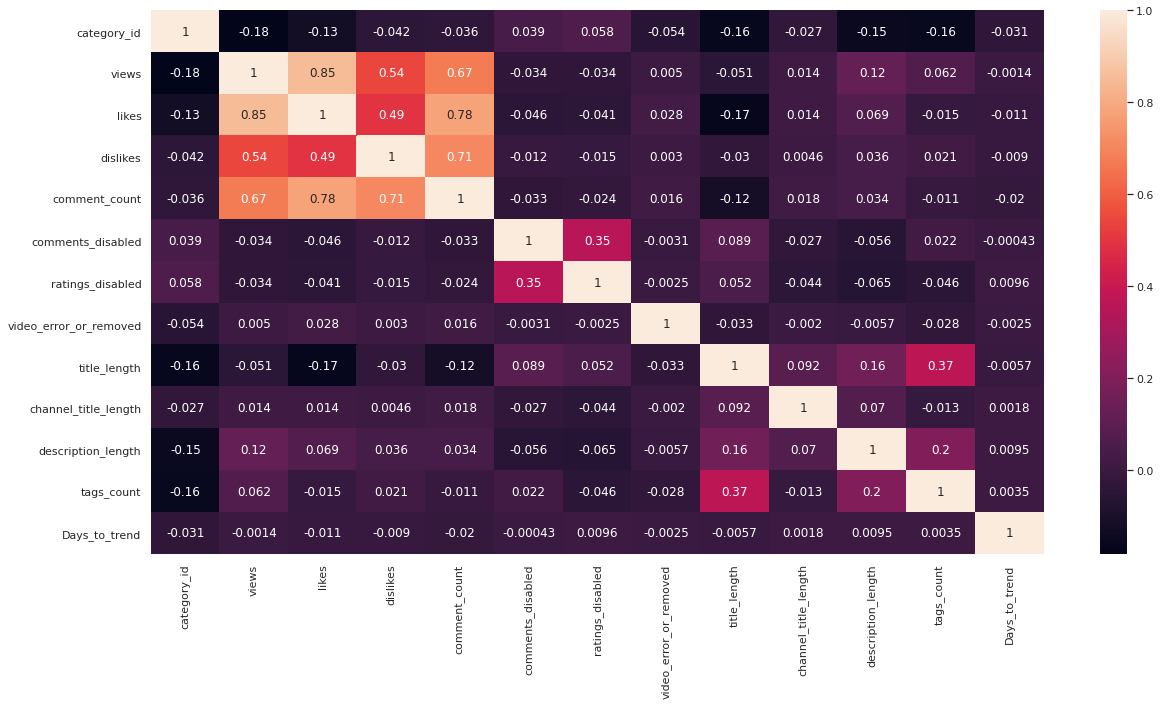

In [42]:
df.corr().loc["likes", :]
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(), annot=True)
print(corrData)

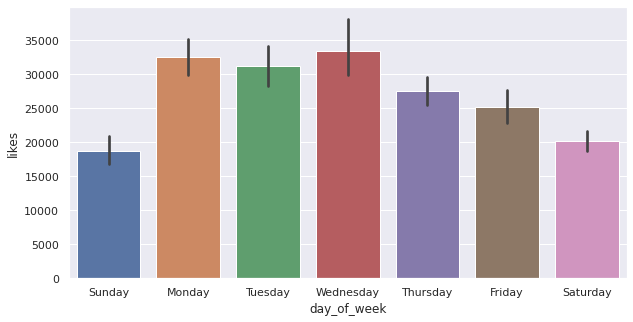

In [43]:
plt.figure(figsize=(10,5))
sns.countplot(x=df["day_of_week"],data=df)

sns.barplot(x=df["day_of_week"],y=df["likes"], order= ["Sunday", "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday"])

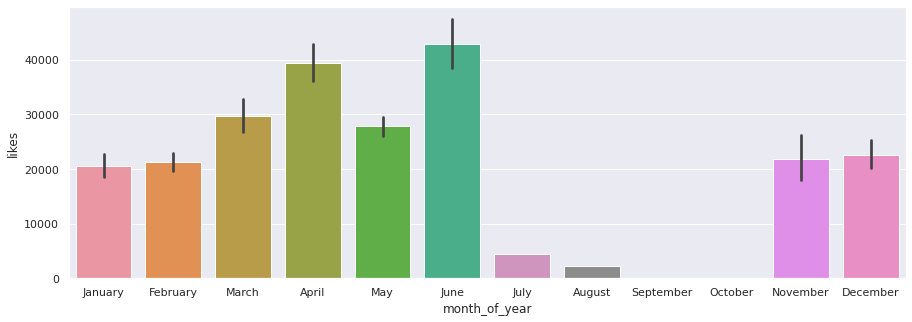

In [44]:
df['month_of_year'] = df['publish_time'].dt.month_name()
plt.figure(figsize=(15,5))
sns.countplot(x=df["month_of_year"],data=df)

sns.barplot(x=df["month_of_year"],y=df["likes"], order=['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'])

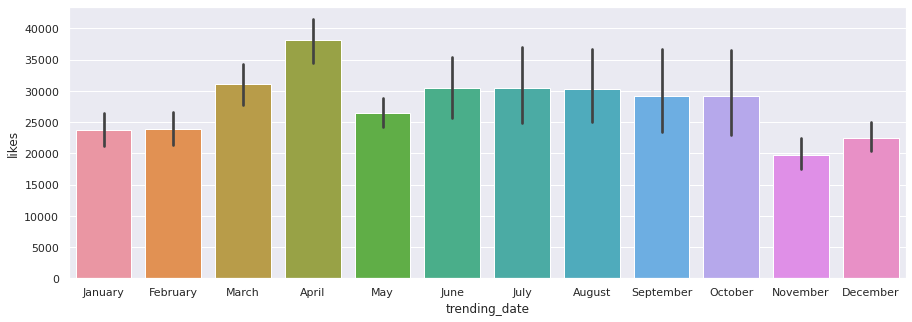

In [45]:
df['trending_date'] = df['trending_date'].dt.month_name()
plt.figure(figsize=(15,5))
sns.countplot(x=df["trending_date"],data=df)

sns.barplot(x=df["trending_date"],y=df["likes"], order=['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'])

AttributeError: ignored